# CITS4403: Computational Modelling - Group Project
## Corona Virus Outbreak 
## This dataset is from Kaggle
### By Jayden Kur, 21988713  Roarke Holland, 21742366, Andrew Ha, 22246801

In [690]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

#from utils import decorate, savefig
np.random.seed(17)

# TODO: remove this when NetworkX is fixed
from warnings import simplefilter
import matplotlib.cbook
simplefilter("ignore", matplotlib.cbook.mplDeprecation)

Reads in data from csv file

In [691]:
import pandas as pd
old_file = "PatientInfo.csv" # Last Updated 30th March
new_file = "PatientInfo_2.csv" # Last Updated 19th April
df = pd.read_csv(old_file, usecols = ['patient_id','sex','age','city','confirmed_date','state'])

In [692]:
df.head()

patient_id     sex  age         city confirmed_date     state
0  1000000001    male  50s   Gangseo-gu        23/1/20  released
1  1000000002    male  30s  Jungnang-gu        30/1/20  released
2  1000000003    male  50s    Jongno-gu        30/1/20  released
3  1000000004    male  20s      Mapo-gu        30/1/20  released
4  1000000005  female  20s  Seongbuk-gu        31/1/20  released

In [693]:
#Use patient_id as the index
df = df.set_index('patient_id')

In [694]:
df.head()

sex  age         city confirmed_date     state
patient_id                                                   
1000000001    male  50s   Gangseo-gu        23/1/20  released
1000000002    male  30s  Jungnang-gu        30/1/20  released
1000000003    male  50s    Jongno-gu        30/1/20  released
1000000004    male  20s      Mapo-gu        30/1/20  released
1000000005  female  20s  Seongbuk-gu        31/1/20  released

In [695]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2771 entries, 1000000001 to 7000000009
Data columns (total 5 columns):
sex               2765 non-null object
age               2758 non-null object
city              2703 non-null object
confirmed_date    2771 non-null object
state             2771 non-null object
dtypes: object(5)
memory usage: 129.9+ KB


In [696]:
#Drop any row with null value
df = df.dropna(how='any',axis=0);
#Drop any row with 'city' = etc
df = df[~df.city.str.contains("etc")];

# Korea City info - https://www.kaggle.com/kimjihoo/coronavirusdataset/discussion/132763

In [697]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2655 entries, 1000000001 to 7000000009
Data columns (total 5 columns):
sex               2655 non-null object
age               2655 non-null object
city              2655 non-null object
confirmed_date    2655 non-null object
state             2655 non-null object
dtypes: object(5)
memory usage: 124.5+ KB


In [698]:
unique_cities = df.city.unique()

In [699]:
len(df.city.unique())

138

In [700]:
unique_cities.sort()

In [701]:
unique_cities

array(['Andong-si', 'Ansan-si', 'Anseong-si', 'Anyang-si', 'Asan-si',
       'Bonghwa-gun', 'Bucheon-si', 'Buk-gu', 'Bupyeong-gu',
       'Busanjin-gu', 'Buyeo-gun', 'Changnyeong-gun', 'Changwon-si',
       'Cheonan-si', 'Cheongdo-gun', 'Cheongju-si', 'Cheongsong-gun',
       'Chilgok-gun', 'Chuncheon-si', 'Chungju-si', 'Daedeok-gu',
       'Dalseo-gu', 'Dalseong-gun', 'Danyang-gun', 'Dobong-gu', 'Dong-gu',
       'Dongdaemun-gu', 'Dongjak-gu', 'Dongnae-gu', 'Eumseong-gun',
       'Eunpyeong-gu', 'Gangbuk-gu', 'Gangdong-gu', 'Gangnam-gu',
       'Gangneung-si', 'Gangseo-gu', 'Geochang-gun', 'Geoje-si',
       'Geumcheon-gu', 'Geumjeong-gu', 'Gijang-gun', 'Gimcheon-si',
       'Gimhae-si', 'Gimje-si', 'Gimpo-si', 'Goesan-gun', 'Goryeong-gun',
       'Goseong-gun', 'Goyang-si', 'Gumi-si', 'Gunpo-si', 'Gunsan-si',
       'Guri-si', 'Guro-gu', 'Gwacheon-si', 'Gwanak-gu', 'Gwangjin-gu',
       'Gwangju-si', 'Gwangmyeong-si', 'Gwangyang-si', 'Gyeongju-si',
       'Gyeongsan-si', 'Gyeryong-si

In [702]:
df.confirmed_date.unique()

array(['23/1/20', '30/1/20', '31/1/20', '5/2/20', '6/2/20', '16/2/20',
       '19/2/20', '20/2/20', '21/2/20', '22/2/20', '23/2/20', '26/2/20',
       '24/2/20', '25/2/20', '27/2/20', '28/2/20', '29/2/20', '1/3/20',
       '2/3/20', '4/3/20', '5/3/20', '6/3/20', '7/3/20', '8/3/20',
       '9/3/20', '10/3/20', '11/3/20', '12/3/20', '13/3/20', '14/3/20',
       '15/3/20', '16/3/20', '17/3/20', '18/3/20', '19/3/20', '20/3/20',
       '21/3/20', '22/3/20', '23/3/20', '24/3/20', '25/3/20', '26/3/20',
       '27/3/20', '28/3/20', '29/3/20', '3/3/20', '18/2/20', '26/1/20',
       '27/1/20', '1/2/20', '2/2/20', '9/2/20', '10/2/20', '30/3/20'],
      dtype=object)

In [703]:
len(df.confirmed_date.unique())

54

In [704]:
#df

In [705]:
df['confirmed_date'] = pd.to_datetime(df['confirmed_date'], format='%d/%m/%y').dt.strftime('%m%d') # Use this for old version

In [706]:
#df['confirmed_date'] = pd.to_datetime(df['confirmed_date'], format='%Y-%m-%d').dt.strftime('%m%d') # USE THIS FOR NEW VERSIONS

In [707]:
df

sex  age             city confirmed_date     state
patient_id                                                       
1000000001    male  50s       Gangseo-gu           0123  released
1000000002    male  30s      Jungnang-gu           0130  released
1000000003    male  50s        Jongno-gu           0130  released
1000000004    male  20s          Mapo-gu           0130  released
1000000005  female  20s      Seongbuk-gu           0131  released
1000000006  female  50s        Jongno-gu           0131  released
1000000007    male  20s        Jongno-gu           0131  released
1000000009    male  30s        Songpa-gu           0205  released
1000000010  female  60s      Seongbuk-gu           0205  released
1000000011  female  50s     Seodaemun-gu           0206  released
1000000013    male  80s        Jongno-gu           0216  released
1000000014  female  60s        Jongno-gu           0216  released
1000000015    male  70s     Seongdong-gu           0219  isolated
1000000016    male  70s        Jongno-gu           0219  released
1000000017    male  70s        Jongno-gu           0220  released
1000000019  female  70s        Jongno-gu           0220  released
1000000020  female  70s     Seongdong-gu           0220  isolated
1000000021    male  80s        Jongno-gu           0220  released
1000000022    male  30s     Seodaemun-gu           0221  isolated
1000000023    male  50s        Seocho-gu           0221  isolated
1000000024    male  40s          Guro-gu           0222  released
1000000025    male  60s      Gangdong-gu           0222  isolated
1000000026    male  30s        Seocho-gu           0222  released
1000000027    male  50s       Gangseo-gu           0223  released
1000000028  female  70s        Jongno-gu           0223  released
1000000029  female  20s        Jongno-gu           0226  released
1000000030    male  60s      Gangdong-gu           0223  released
1000000031    male  50s        Songpa-gu           0222  released
1000000032    male  50s        Seocho-gu           0223  isolated
1000000033  female  50s        Songpa-gu           0224  released
...            ...  ...              ...            ...       ...
6100000074  female  30s      Changwon-si           0304  isolated
6100000075    male   0s      Changwon-si           0305  released
6100000076    male  20s  Changnyeong-gun           0305  released
6100000077  female  70s     Geochang-gun           0305  released
6100000078  female  40s      Changwon-si           0305  isolated
6100000079    male  20s  Changnyeong-gun           0306  released
6100000080  female  50s     Geochang-gun           0306  released
6100000081  female  70s     Geochang-gun           0306  released
6100000082    male  50s     Geochang-gun           0307  released
6100000083    male  20s         Geoje-si           0310  isolated
6100000084    male  40s         Geoje-si           0311  released
6100000085    male  30s      Changwon-si           0316  isolated
6100000086    male  50s      Changwon-si           0319  isolated
6100000087  female  50s      Changwon-si           0321  isolated
6100000088    male  20s      Changwon-si           0322  isolated
6100000089    male  60s        Haman-gun           0323  isolated
6100000090    male  40s       Yangsan-si           0326  isolated
6100000091  female  20s        Gimhae-si           0328  isolated
6100000092    male  40s      Changwon-si           0328  isolated
6100000093  female  50s         Jinju-si           0328  isolated
6100000094    male  20s        Gimhae-si           0329  isolated
6100000095    male  50s      Changwon-si           0320  isolated
7000000001    male  20s          Jeju-do           0220  released
7000000002  female  20s          Jeju-do           0222  released
7000000004    male  40s          Jeju-do           0304  released
7000000005  female  20s          Jeju-do           0324  isolated
7000000006    male  30s          Jeju-do           0324  isolated
7000000007  female  20s          Jeju-do           0325

### Can change the string below to format dates

In [708]:
#df = df[df['confirmed_date'] < '0230'] # this works for all except date_list in animation

In [901]:
def populate_graph(df):
    graph = nx.Graph()
    for city in unique_cities:
        graph.add_node(city)
    node_names = df['city'].value_counts().index.to_list()
    node_sizes = df['city'].value_counts().to_list()
    labels = {}
    for name,size in zip(node_names,node_sizes):
        labels[name] = name+ '\n' +str(size)
    node_size = [20*node_sizes[ii] for ii in range(len(node_names))]# MADE THIS 20 * COUNT as the values were too small to see
    return graph,node_names,node_sizes,node_size,labels

In [902]:
graph,node_names,node_sizes,node_size,labels = populate_graph(df)
pos = nx.random_layout(graph)

In [903]:
def draw_graph_coloured(graph,pos,node_names,node_size,labels,gender=False,deaths=False):   
    plt.figure(1,figsize=(20,20))  
    if(gender == True):  
        node_colours = ["hotpink" if graph.nodes[cities]['Females'] > graph.nodes[cities]['Males'] else "blue" 
                       for cities in graph.nodes]
        node_size = [50*graph.nodes[cities]['Females'] if graph.nodes[cities]['Females'] > graph.nodes[cities]['Males'] 
                     else 50*graph.nodes[cities]['Males']
                     for cities in graph.nodes]
        labels = {}
        for name,size in zip(graph.nodes,node_size):
            if (size == 0):
                labels[name] = ''
            else:
                labels[name] = name + '\n' +str(int(size/50))
        text = 'Males and Females'
        nx.draw(graph,pos,nodelist=graph.nodes,node_size=node_size,node_color=node_colours,labels=labels,with_labels=True)
    elif(deaths == True):
        node_size = [100*graph.nodes[cities]['Deaths'] for cities in graph.nodes]
        labels = {}
        for cities,size in zip(graph.nodes,node_size):
            if (size == 0):
                labels[cities] = ''
            else:
                labels[cities] = cities + '\n' +str(int(size/100))
        nx.draw(graph,pos,nodelist=graph.nodes,node_size=node_size,node_color='gray',labels=labels,with_labels=True,label='HELLO')
        text = 'Deaths'
    else:
        nx.draw(graph,pos,nodelist=node_names,node_size=node_size,node_color='red',labels=labels,with_labels=True)
        text = 'Cases'
    plt.title(text, fontsize=30, fontfamily='serif',fontweight='roman')
    plt.axis('equal')
    plt.show()

In [904]:
# ADD THE CASES TO EACH NODE
def get_cases(node_names,node_sizes,graph):
    for ii in range(len(node_names)):
        attrs = {node_names[ii]: {'Cases': node_sizes[ii]}}
        nx.set_node_attributes(graph, attrs)
    return graph

In [905]:
graph = get_cases(node_names,node_sizes,graph)

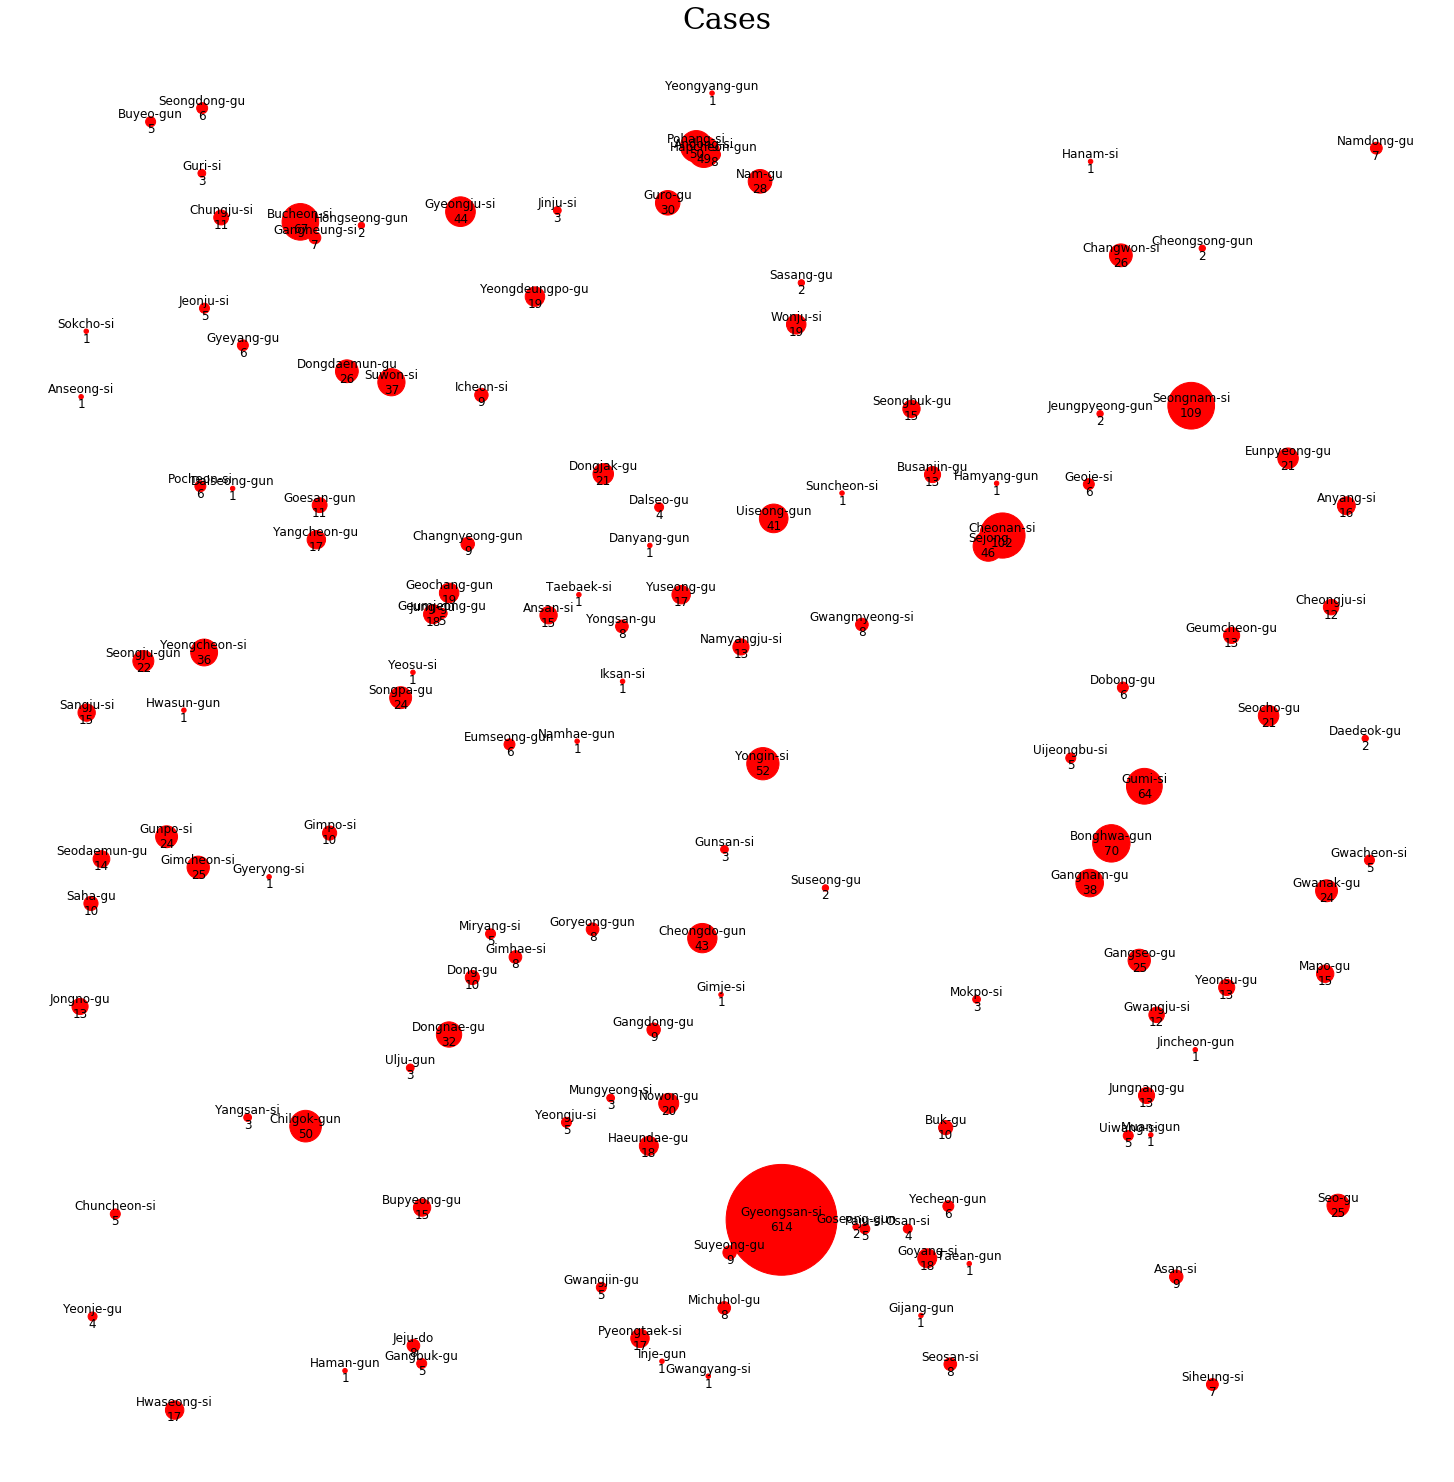

In [906]:
draw_graph_coloured(graph,pos,node_names,node_size,labels)

In [907]:
graph.nodes['Gyeongsan-si']['Cases']

614

In [908]:
# Add the deaths to each node
def get_deaths(new_df):
    #death_df = new_df[new_df.state=='deceased']
    death_df = new_df['state'].sort_index()  
    for ii in range(len(death_df)):
        index_city =  death_df.index[ii]
        try:
            deaths = death_df[index_city].value_counts()['deceased']
        except:
            deaths = 0
        attrs = {index_city: {'Deaths': deaths}}
        nx.set_node_attributes(graph, attrs)
    return graph

In [909]:
new_df = df.set_index('city')

In [910]:
graph = get_deaths(new_df)
print(graph.nodes['Gyeongsan-si'])
print(graph.nodes['Dong-gu'])

{'Cases': 614, 'Deaths': 17}
{'Cases': 10, 'Deaths': 0}


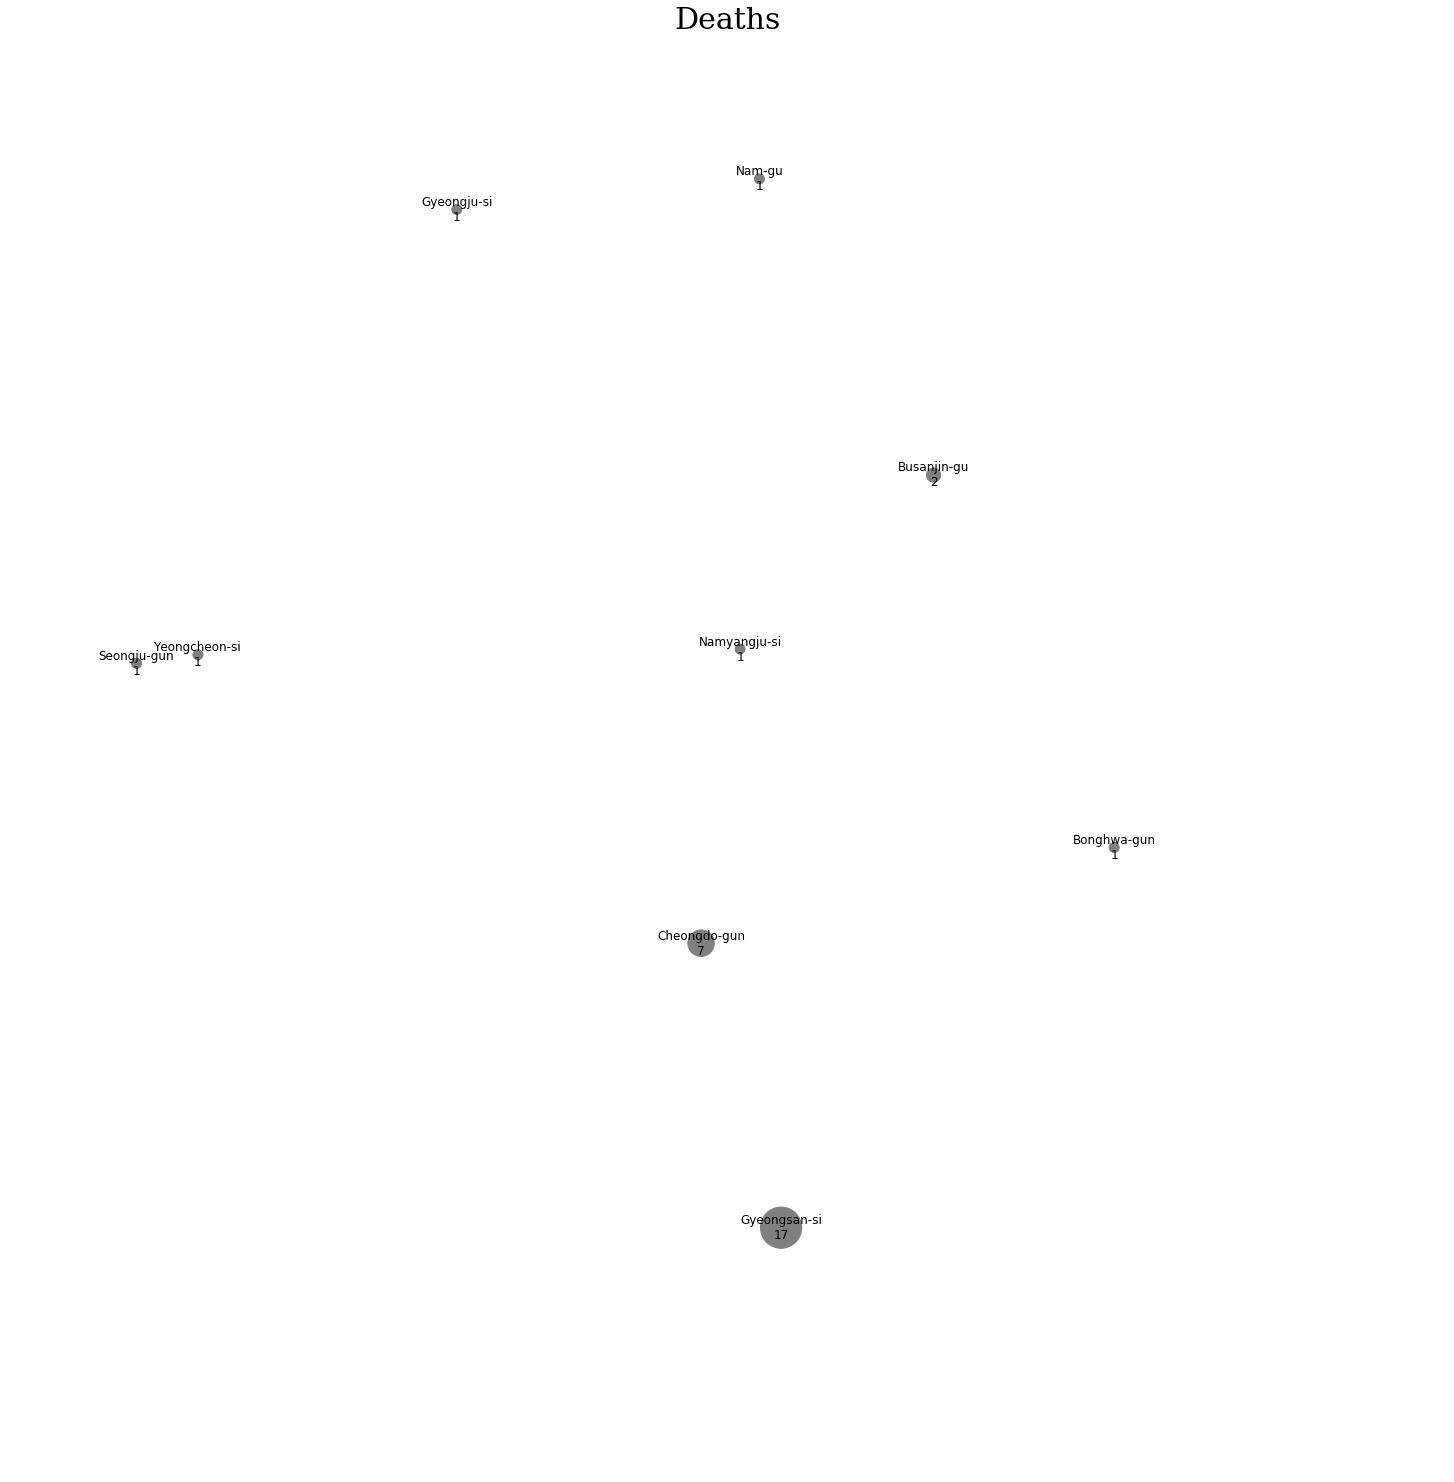

In [911]:
draw_graph_coloured(graph,pos,node_names,node_size,labels,deaths=True)

In [912]:
# ADD THE GENDER COUNTS TO EACH NODE
def get_gender(new_df):
    new_sort_df = new_df['sex'].sort_index()
    for ii in range(len(new_sort_df)):
        index_city = new_sort_df.index[ii]
        try:
            males = new_sort_df[index_city].value_counts()['male']
        except:
            males = 0
        try:
            females = new_sort_df[index_city].value_counts()['female']
        except:
            females = 0
        attrs = {index_city: {'Males': males, 'Females': females}}
        nx.set_node_attributes(graph, attrs)
    return graph

In [913]:
graph = get_gender(new_df)
print(graph.nodes['Gyeongsan-si'])

{'Cases': 614, 'Deaths': 17, 'Males': 205, 'Females': 409}


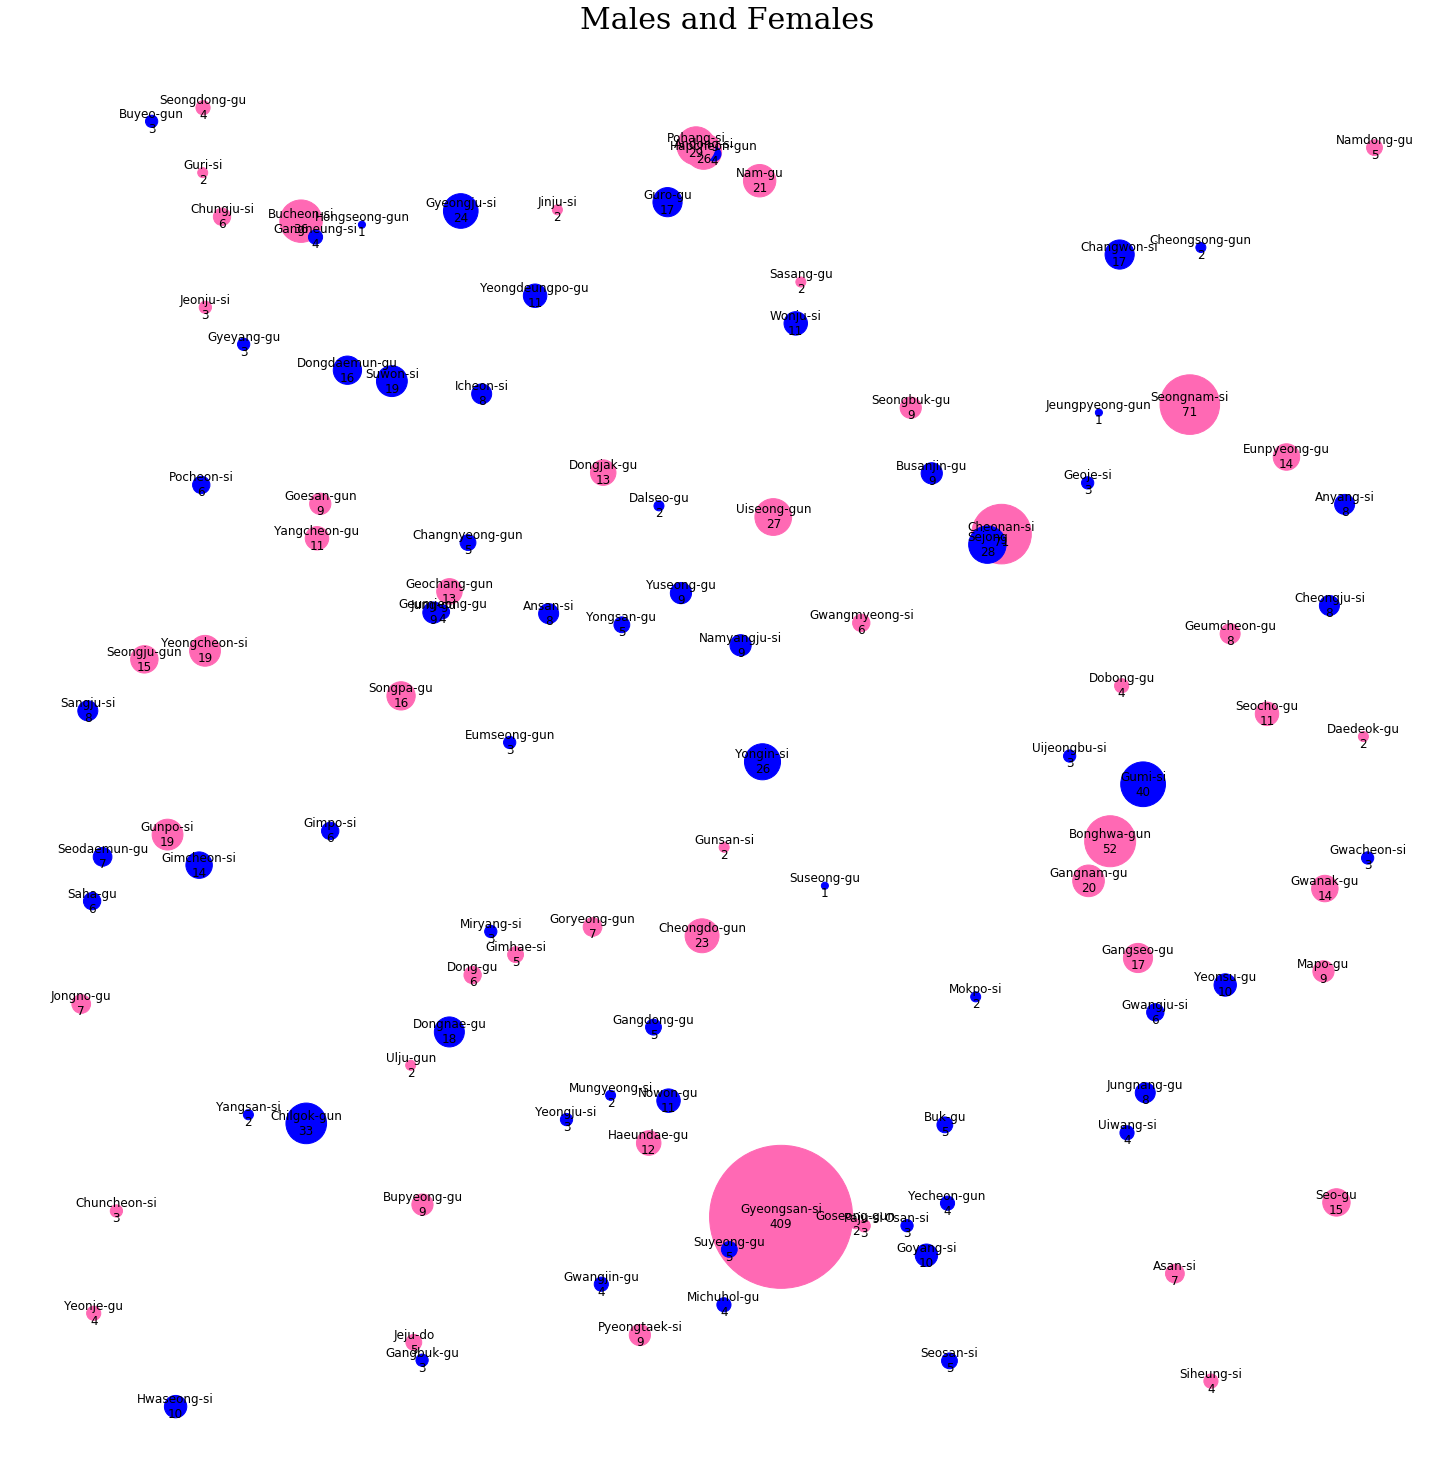

In [914]:
draw_graph_coloured(graph,pos,node_names,node_size,labels,gender=True)

In [915]:
# ADD THE AGE GROUPS TO EACH NODE
def get_age_groups(new_df):
    new_sort_df = new_df['age'].sort_index()
    age_groups = list()
    for ii in range(len(new_sort_df)):
        index_city = new_sort_df.index[ii]
        try:
            zeroes = new_sort_df[index_city].value_counts()['0s']
        except:
            zeroes = 0
        try:
            tens = new_sort_df[index_city].value_counts()['10s']
        except:
            tens = 0
        try:
            twenties = new_sort_df[index_city].value_counts()['20s']
        except:
            twenties = 0
        try:
            thirties = new_sort_df[index_city].value_counts()['30s']
        except:
            thirties = 0
        try:
            fourties = new_sort_df[index_city].value_counts()['40s']
        except:
            fourties = 0
        try:
            fifties = new_sort_df[index_city].value_counts()['50s']
        except:
            fifties = 0
        try:
            sixties = new_sort_df[index_city].value_counts()['60s']
        except:
            sixties = 0
        try:
            seventies = new_sort_df[index_city].value_counts()['70s']
        except:
            seventies = 0
        try:
            eighties = new_sort_df[index_city].value_counts()['80s']
        except:
            eighties = 0
        try:
            nineties = new_sort_df[index_city].value_counts()['90s']
        except:
            nineties = 0
        #attrs = {index_city: {'Age Groups': [zeroes,tens,twenties,thirties,fourties,fifties,sixties,seventies,eighties,nineties]}}
        attrs = {index_city: {'Age Groups': {'0s':zeroes,'10s':tens,'20s':twenties,'30s':thirties,'40s':fourties,'50s':fifties,'60s':sixties,'70s':seventies,'80s':eighties,'90s':nineties}}}
        nx.set_node_attributes(graph, attrs)
    return graph

In [916]:
graph = get_age_groups(new_df)
print(graph.nodes['Gyeongsan-si']['Age Groups']['10s'])
print(graph.nodes['Jungnang-gu'])
print(graph.nodes['Seongbuk-gu'])

24
{'Cases': 13, 'Deaths': 0, 'Males': 8, 'Females': 5, 'Age Groups': {'0s': 0, '10s': 1, '20s': 6, '30s': 2, '40s': 2, '50s': 1, '60s': 1, '70s': 0, '80s': 0, '90s': 0}}
{'Cases': 15, 'Deaths': 0, 'Males': 6, 'Females': 9, 'Age Groups': {'0s': 0, '10s': 0, '20s': 6, '30s': 2, '40s': 1, '50s': 4, '60s': 2, '70s': 0, '80s': 0, '90s': 0}}


In [917]:
unique_dates = df['confirmed_date'].unique()

In [918]:
unique_dates_list = list(unique_dates)

In [919]:
unique_dates_list.sort()
#unique_dates_list

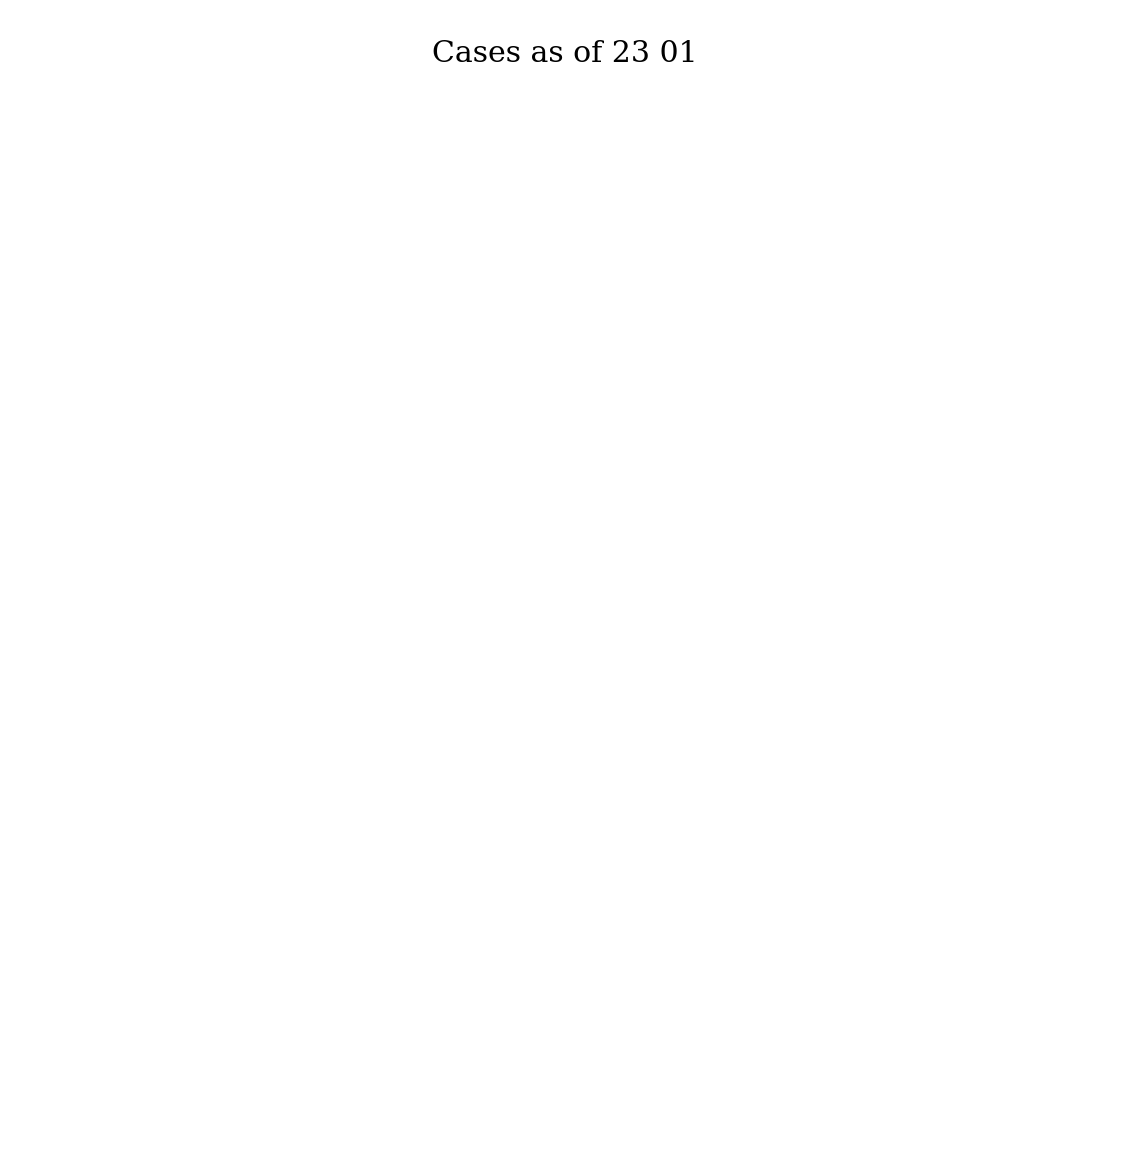

In [920]:
from matplotlib.animation import FuncAnimation
#date_list = ['0123','0130',
#             '0205','0210','0215','0220','0225','0229', 
#             '0305','0310','0315','0320','0325','0330']
date_list = unique_dates_list # this is better
def animate(i):
    fig.clf() # Clears the axis each time
    ax = fig.add_subplot(111)
    #ax.set_aspect('equal')
    new_df = df.set_index('confirmed_date')
    new_df = new_df[new_df.index < date_list[i]]
    text = '\nCases as of ' + date_list[i][2:4] + ' '+ date_list[i][0:2]
    node_names = new_df['city'].value_counts().index.to_list()
    node_sizes = new_df['city'].value_counts().to_list()
    labels = {}
    for name,size in zip(node_names,node_sizes):
        labels[name] = name+ '\n' +str(size)
        
    node_size = [50 * node_sizes[ii] for ii in range(len(node_names))]
    nx.draw(graph,pos,nodelist=node_names,node_size=node_size,node_color='red',labels=labels,with_labels=True)
    ax.set_title(text, fontsize=30, fontfamily='serif',fontweight='roman')
    
fig = plt.figure(1,figsize=(20,20)) 

anim = FuncAnimation(fig, animate, frames=len(date_list), interval=400, repeat=True) # Animator call
anim.save('covid.gif', writer='imagemagick')

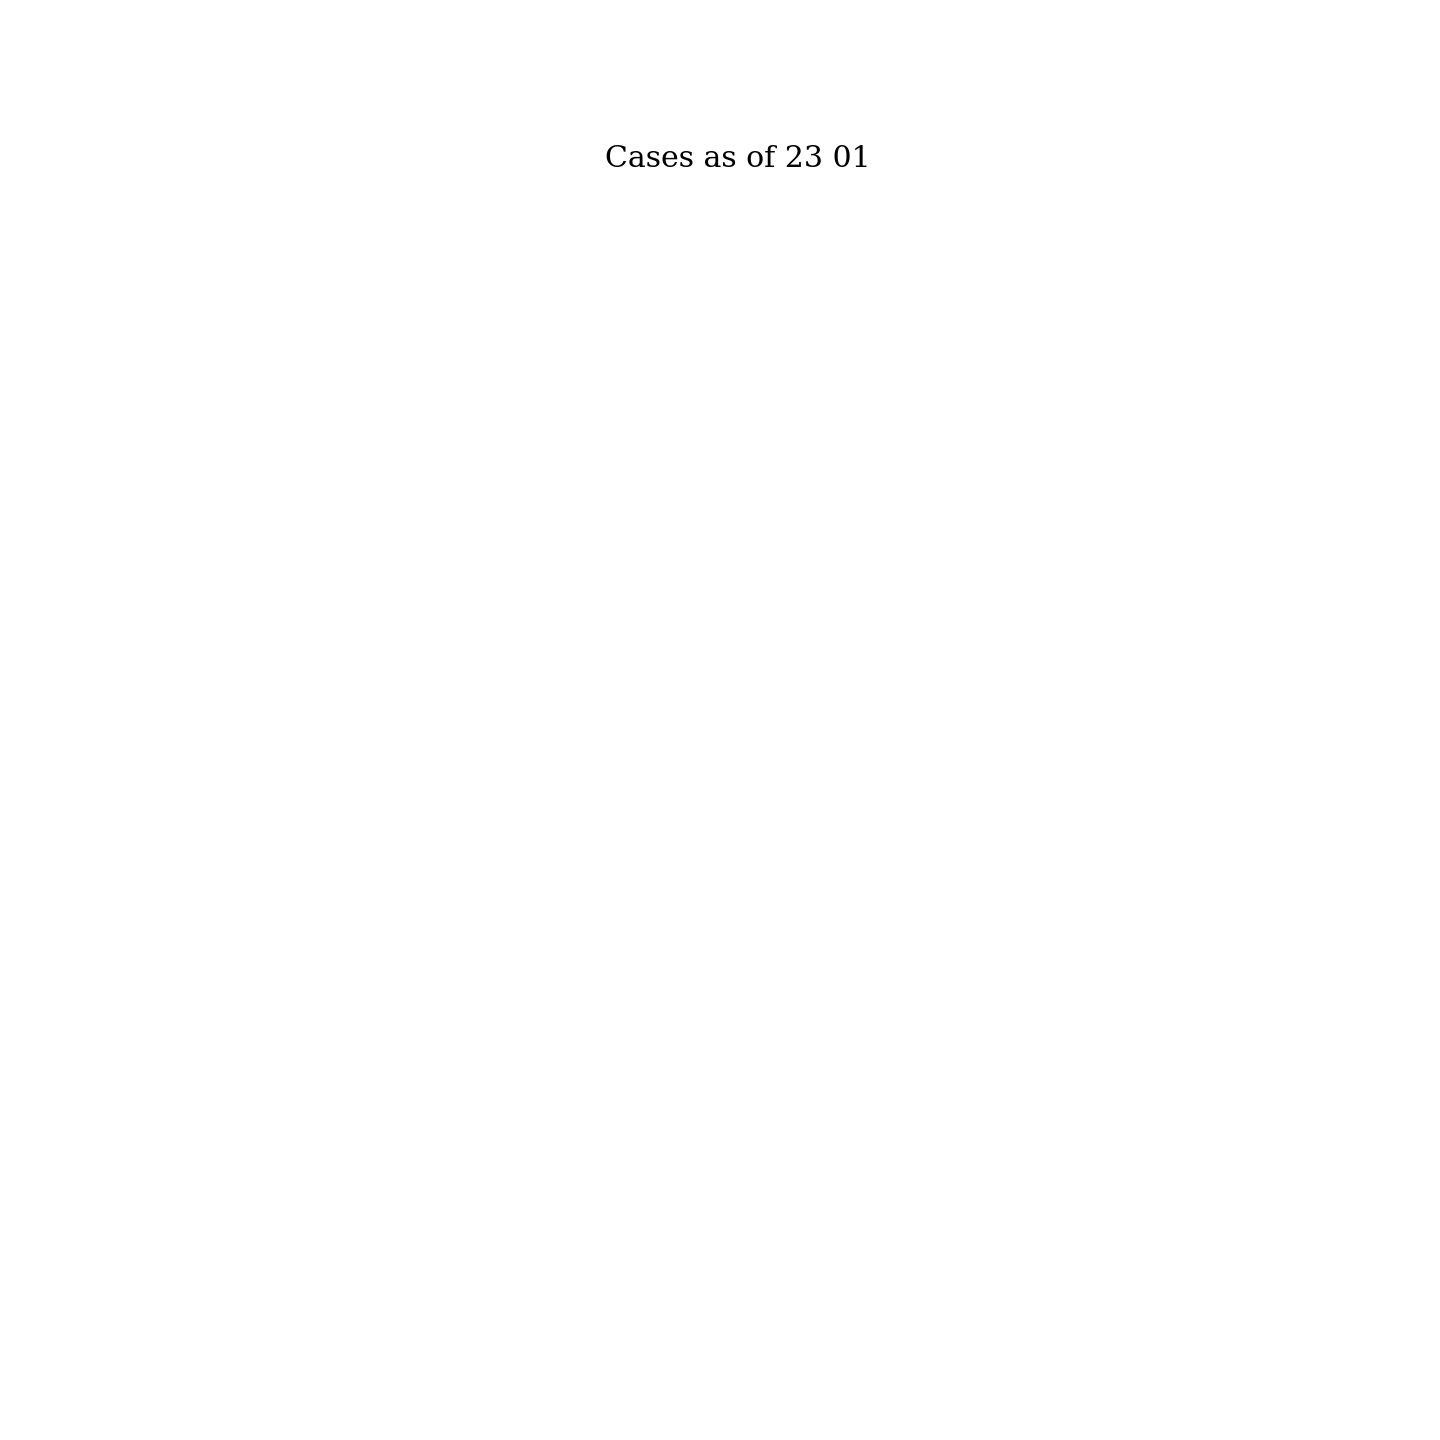

In [921]:
from IPython.display import Image
Image("covid.gif")

In [922]:
def city_printer():
    print('Cases by City:\n')
    for cities in graph.nodes:
        cases = graph.nodes[cities]['Cases']
        if(len(str(cities)) > 13): # FIXES BAD PRINTING
            tab = '\t'
        else:
            tab = '\t\t'
        print(str(cities)+':',tab,cases,('\t\t{0:.3%}').format(cases/total_cases),'of total cases')

In [923]:
# THIS LOOKS REALLY MESSY LOL
def age_group_printer():
    zeroes=tens=twenties=thirties=fourties=fifties=sixties=seventies=eighties=nineties = 0
    for cities in graph.nodes:
        zeroes += graph.nodes[cities]['Age Groups']['0s']
        tens += graph.nodes[cities]['Age Groups']['10s']
        twenties += graph.nodes[cities]['Age Groups']['20s']
        thirties += graph.nodes[cities]['Age Groups']['30s']
        fourties += graph.nodes[cities]['Age Groups']['40s']
        fifties += graph.nodes[cities]['Age Groups']['50s']
        sixties += graph.nodes[cities]['Age Groups']['60s']
        seventies += graph.nodes[cities]['Age Groups']['70s']
        eighties += graph.nodes[cities]['Age Groups']['80s']
        nineties += graph.nodes[cities]['Age Groups']['90s']
        
    print('\nCases by Age:\n')
    print('Zeroes:\t\t',zeroes,('\t\t{0:.3%}').format(zeroes/total_cases),'of total cases',
          '\nTens:\t\t',tens,('\t\t{0:.3%}').format(tens/total_cases),'of total cases',
          '\nTwenties:\t',twenties,('\t\t{0:.3%}').format(twenties/total_cases),'of total cases',
          '\nThirties:\t',thirties,('\t\t{0:.3%}').format(thirties/total_cases),'of total cases',
          '\nFourties:\t',fourties,('\t\t{0:.3%}').format(fourties/total_cases),'of total cases',
          '\nFifties:\t',fifties,('\t\t{0:.3%}').format(fifties/total_cases),'of total cases',
          '\nSixties:\t',sixties,('\t\t{0:.3%}').format(sixties/total_cases),'of total cases',
          '\nSeventies:\t',seventies,('\t\t{0:.3%}').format(seventies/total_cases),'of total cases',
          '\nEighties:\t',eighties,('\t\t{0:.3%}').format(eighties/total_cases),'of total cases',
          '\nNineties:\t',nineties,('\t\t{0:.3%}').format(nineties/total_cases),'of total cases')

##Compact version of previous function

In [924]:
def age_group_print_compact():    
    ages = ['0s','10s','20s','30s','40s','50s','60s','70s','80s','90s']
    ages_name = ['Zeroes:','Tens:','Twenties:','Thirties:','Fourties:','Fifties:','Sixties:','Seventies:','Eighties:','Nineties:']
    age_tally = [0 for j in range(10)]
    for age_group in range(len(x)):
        for cities in graph.nodes:
            age_tally[age_group] += graph.nodes[cities]['Age Groups'][x[age_group]]
    sum = np.sum(age_tally)
    for age_group in range(len(x)):
        print("{0:12} \t {1} \t {2:.3%} of total cases".format(ages_name[age_group], age_tally[age_group],age_tally[age_group]/sum ))
    #print('Zeroes:\t\t',zeroes,('\t\t{0:.3%}').format(zeroes/total_cases),'of total cases'.format())

In [925]:
age_group_print_compact()

NameError: name 'x' is not defined

In [736]:
def gender_printer():
    males=females=0
    for cities in graph.nodes:
        males += graph.nodes[cities]['Males']
        females += graph.nodes[cities]['Females']
    print('\nCases by Gender:\n')
    print('Males:\t\t',males,('\t\t{0:.3%}').format(males/total_cases),'of total cases',
          '\nFemales:\t',females,('\t\t{0:.3%}').format(females/total_cases),'of total cases')

In [738]:
total_cases = 0
for cities in graph.nodes:
    total_cases += graph.nodes[cities]['Cases']
print('Total Cases:',total_cases)

Total Cases: 2655


In [739]:
city_printer()

Cases by City:

Andong-si: 		 49 		1.846% of total cases
Ansan-si: 		 15 		0.565% of total cases
Anseong-si: 		 1 		0.038% of total cases
Anyang-si: 		 16 		0.603% of total cases
Asan-si: 		 9 		0.339% of total cases
Bonghwa-gun: 		 70 		2.637% of total cases
Bucheon-si: 		 67 		2.524% of total cases
Buk-gu: 		 10 		0.377% of total cases
Bupyeong-gu: 		 15 		0.565% of total cases
Busanjin-gu: 		 13 		0.490% of total cases
Buyeo-gun: 		 5 		0.188% of total cases
Changnyeong-gun: 	 9 		0.339% of total cases
Changwon-si: 		 26 		0.979% of total cases
Cheonan-si: 		 102 		3.842% of total cases
Cheongdo-gun: 		 43 		1.620% of total cases
Cheongju-si: 		 12 		0.452% of total cases
Cheongsong-gun: 	 2 		0.075% of total cases
Chilgok-gun: 		 50 		1.883% of total cases
Chuncheon-si: 		 5 		0.188% of total cases
Chungju-si: 		 11 		0.414% of total cases
Daedeok-gu: 		 2 		0.075% of total cases
Dalseo-gu: 		 4 		0.151% of total cases
Dalseong-gun: 		 1 		0.038% of total cases
Danyang-gun: 		 1 		

In [740]:
age_group_printer()
gender_printer()


Cases by Age:

Zeroes:		 38 		1.431% of total cases 
Tens:		 115 		4.331% of total cases 
Twenties:	 626 		23.578% of total cases 
Thirties:	 331 		12.467% of total cases 
Fourties:	 378 		14.237% of total cases 
Fifties:	 504 		18.983% of total cases 
Sixties:	 319 		12.015% of total cases 
Seventies:	 151 		5.687% of total cases 
Eighties:	 129 		4.859% of total cases 
Nineties:	 41 		1.544% of total cases

Cases by Gender:

Males:		 1143 		43.051% of total cases 
Females:	 1490 		56.121% of total cases


In [741]:
def choose_dates(df,date):
    df_new = df[df['confirmed_date'] < date]
    graph,node_names,node_sizes,node_size,labels = populate_graph(df_new)
    graph = get_cases(node_names,node_sizes,graph)
    return graph

In [742]:
def date_difference(date_low,date_high):
    date_diff = (int(date_high) - int(date_low))
    month_high = (int((int(date_high))/100))
    month_low = (int((int(date_low))/100))
    day_high = (int(date_high)%100)
    day_low = (int(date_low)%100)
    if((month_high-month_low) == 1):
        date_diff = day_high + 30 - day_low
    elif((month_high-month_low) == 2):
        date_diff = day_high + 60 - day_low
    elif((month_high-month_low) == 3):
        date_diff = day_high + 90 - day_low
    elif((month_high-month_low) == 4):
        date_diff = day_high + 120 - day_low
    elif((month_high-month_low) == 5):
        date_diff = day_high + 150 - day_low
    return date_diff

In [743]:
def ave_growth_per_day(g,g_2,date_low,date_high): # Change of final amount from earlier amount
    date_diff = date_difference(date_low,date_high)
    print('Case growth per day from',date_low,'to',date_high,'('+str(date_diff),'days)\n')
    max_cases = 0
    max_city = ''
    temp = 0
    cases_list = list()
    for cities in g.nodes:
        try:
            cases = g.nodes[cities]['Cases']
        except:
            cases = 0
        try:
            cases_2 = g_2.nodes[cities]['Cases']
        except:
            cases_2 = 0
        sub_cases = cases - cases_2
        temp = sub_cases
        cases_list.insert(0,[sub_cases/date_diff,cities])
        if (temp > max_cases):
            max_cases = temp
            max_city = cities
            temp = 0
        if(len(str(cities)) > 13): # FIXES BAD PRINTING
            tab = '\t'
        else:
            tab = '\t\t'
        print(cities+':',tab,('{0:.3}').format(sub_cases/date_diff))
    print('\nMax daily growth of',('{0:.3}').format(max_cases/date_diff),'at',max_city)
    return sorted(cases_list,reverse=True)

In [744]:
latest_date = unique_dates_list[-1]
date_low = '0100'
#date_high = '0330'
date_high = latest_date
graph_low = choose_dates(df,date_low)
graph_high = choose_dates(df,date_high)

In [745]:
cases_list = ave_growth_per_day(graph_high,graph_low,date_low,date_high)

Case growth per day from 0100 to 0330 (90 days)

Andong-si: 		 0.544
Ansan-si: 		 0.167
Anseong-si: 		 0.0111
Anyang-si: 		 0.178
Asan-si: 		 0.1
Bonghwa-gun: 		 0.778
Bucheon-si: 		 0.744
Buk-gu: 		 0.111
Bupyeong-gu: 		 0.167
Busanjin-gu: 		 0.144
Buyeo-gun: 		 0.0444
Changnyeong-gun: 	 0.1
Changwon-si: 		 0.289
Cheonan-si: 		 1.13
Cheongdo-gun: 		 0.478
Cheongju-si: 		 0.133
Cheongsong-gun: 	 0.0222
Chilgok-gun: 		 0.556
Chuncheon-si: 		 0.0556
Chungju-si: 		 0.122
Daedeok-gu: 		 0.0222
Dalseo-gu: 		 0.0444
Dalseong-gun: 		 0.0111
Danyang-gun: 		 0.0111
Dobong-gu: 		 0.0667
Dong-gu: 		 0.111
Dongdaemun-gu: 		 0.289
Dongjak-gu: 		 0.233
Dongnae-gu: 		 0.356
Eumseong-gun: 		 0.0667
Eunpyeong-gu: 		 0.233
Gangbuk-gu: 		 0.0556
Gangdong-gu: 		 0.1
Gangnam-gu: 		 0.422
Gangneung-si: 		 0.0778
Gangseo-gu: 		 0.278
Geochang-gun: 		 0.211
Geoje-si: 		 0.0667
Geumcheon-gu: 		 0.144
Geumjeong-gu: 		 0.0556
Gijang-gun: 		 0.0111
Gimcheon-si: 		 0.256
Gimhae-si: 		 0.0889
Gimje-si: 		 0.0111
Gi

In [746]:
def draw_top_growers(top,cases_list,date_low,date_high):
    cases_temp = cases_list[0:top]
    cases = [case[0] for case in cases_temp]
    cities = [city[1] for city in cases_temp]
    y_pos = np.arange(len(cities))

    fig, ax = plt.subplots(figsize=(top+5,top+5))

    plt.bar(y_pos, cases)
    plt.xticks(y_pos, cities)

    ax.set(xlabel='Cities', ylabel='New Cases/Day',
           title='Top '+str(top)+' Daily Growth')
    plt.show()

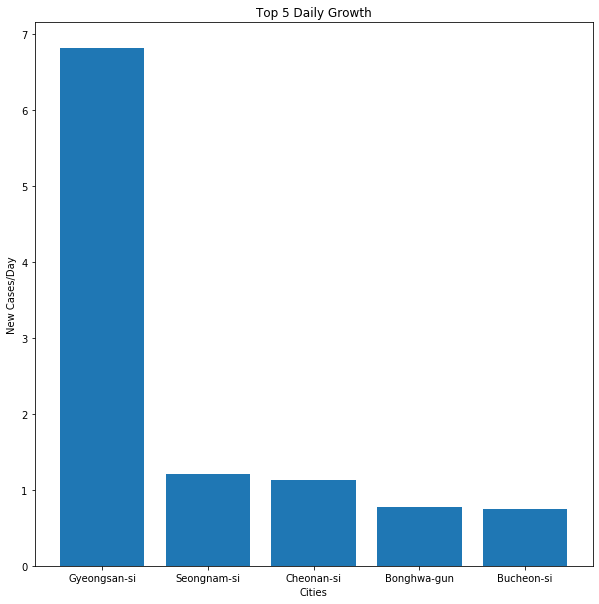

In [747]:
draw_top_growers(5,cases_list,date_low,date_high) # Can change the first input to change the "top" amount

In [748]:
def city_cases(df,date_list,city):
    city_case = list()
    for date in date_list:
        date_1 = choose_dates(df,date)
        try:
            cases = date_1.nodes[city]['Cases']
        except:
            cases = 0
        city_case.insert(0,cases)
    return sorted(city_case,reverse=False)

In [978]:
def plot_time_cases(df,date_list,city):
    city_case = city_cases(df,date_list,city)
    # Data for plotting
    dates = date_list # X
    cases = city_case  # Y

    fig, ax = plt.subplots(figsize=(20,12), sharex=True, sharey=True)
    ax.plot(dates, cases)
    plt.xticks(rotation=45)
    ax.set(xlabel='Dates', ylabel='Cases',
           title='Cases by Date: '+city)
    ax.xaxis.set_major_locator(plt.MaxNLocator(int(len(date_list)/3))) # Fixes tick interval
    plt.show()

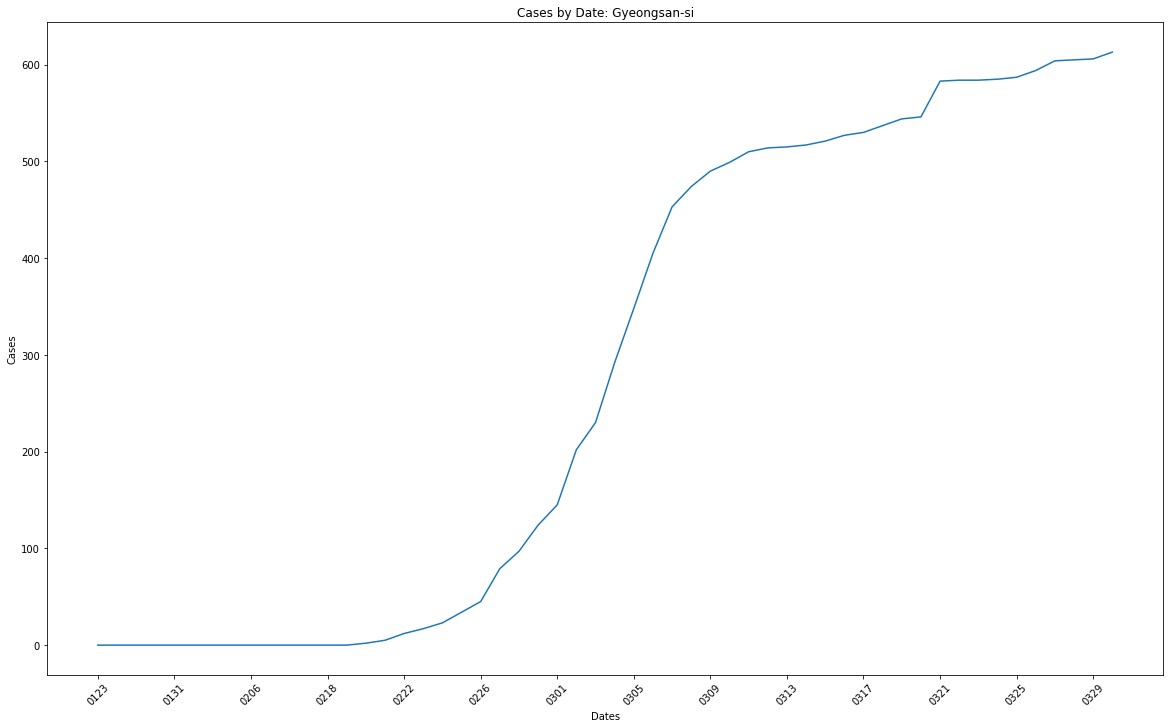

In [979]:
city = 'Gyeongsan-si'
plot_time_cases(df,date_list,city)

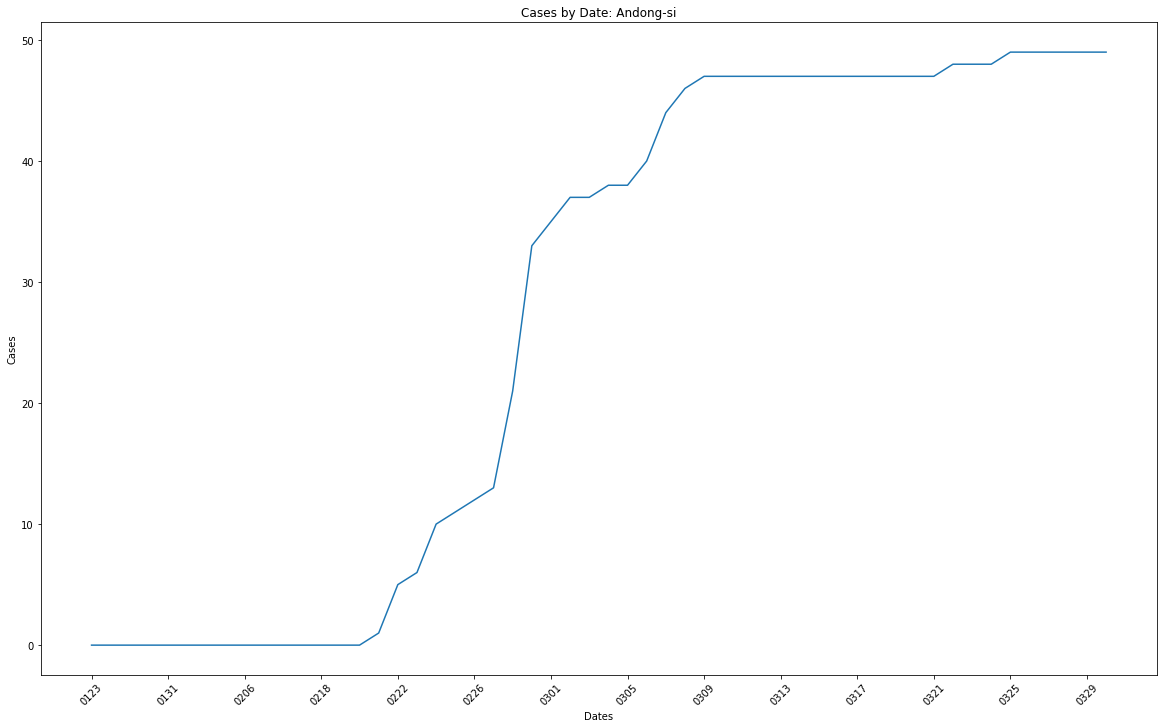

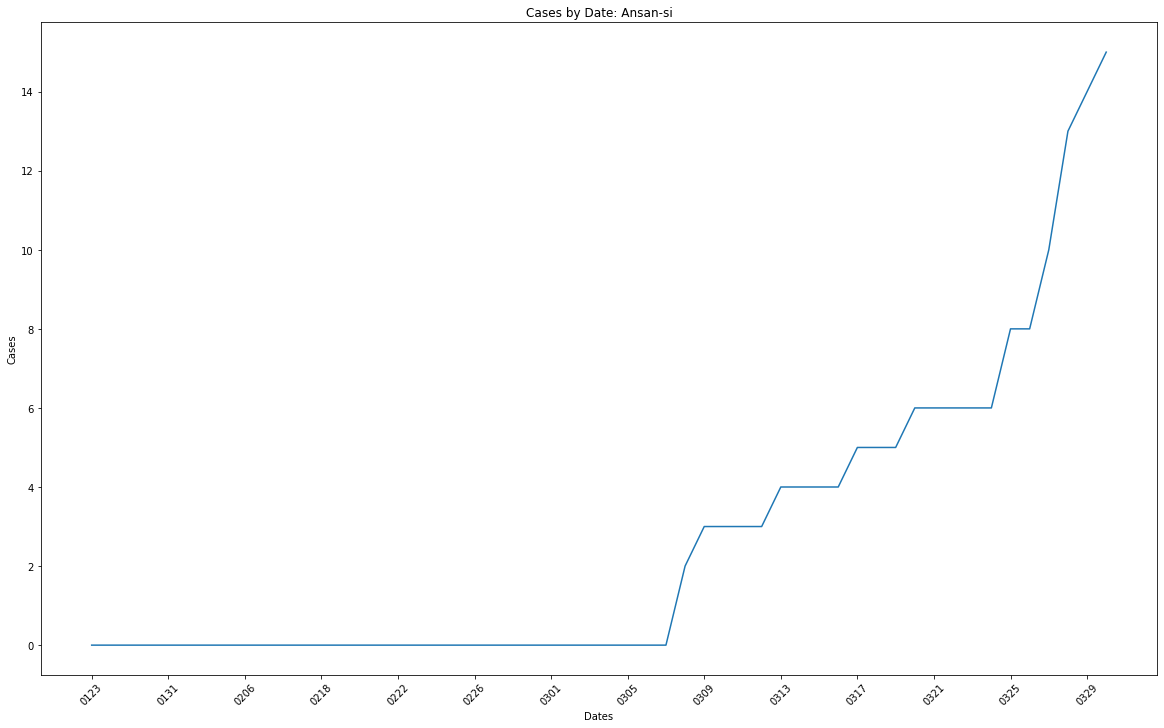

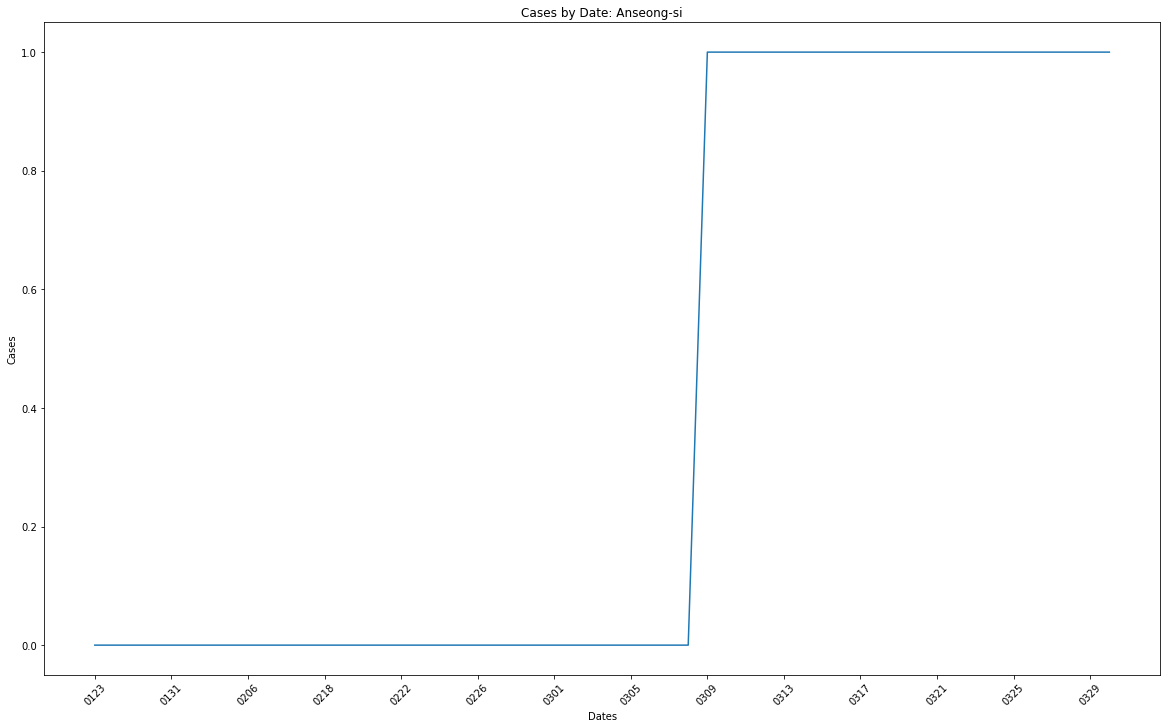

In [980]:
for ii in range(3):
    city = unique_cities[ii]
    plot_time_cases(df,date_list,city)

## The following is for importing the second csv if required

In [752]:
df_2 = pd.read_csv("PatientRoute.csv", usecols = ['patient_id','city','latitude','longitude'])

In [753]:
df_2.head()

patient_id         city   latitude   longitude
0  1000000002  Gwangjin-gu  37.563992  127.029534
1  1000000002   Gangbuk-gu  37.592057  127.018898
2  1000000002   Gangbuk-gu  37.591669  127.018420
3  1000000002  Seongbuk-gu  37.606498  127.092761
4  1000000002  Seongbuk-gu  37.612772  127.098167

In [ ]:
#Use patient_id as the index
df_2 = df_2.set_index('patient_id')

In [ ]:
df_2.head()

In [ ]:
#Drop any row with null value
df_2 = df_2.dropna(how='any',axis=0);

#Drop any row with 'city' = etc
df_2 = df_2[~df_2.city.str.contains("etc")];

In [ ]:
df_2.info()

In [ ]:
df_2 = df_2.set_index('city')

In [ ]:
df_2.head()

In [ ]:
#df_test = df_2.drop_duplicates(subset='index', keep='last', inplace=False)
df_test = df_2.loc[~df_2.index.duplicated(keep='last')]

In [ ]:
df_test.head()

In [ ]:
df_test.info()

In [ ]:
df_test.index.sort_values()

In [ ]:
unique_cities

In [ ]:
# def choose_dates(df,date_low,date_high):
#     df_new = df[df['confirmed_date'] > date_low]
#     df_new = df_new[df_new['confirmed_date'] < date_high]
#     graph,node_names,node_sizes,node_size,labels = populate_graph(df_new)
#     graph = get_cases(node_names,node_sizes,graph)
#     return graph
# def ave_growth_per_day(graph_2,date_low,date_high): # WORKS WITH NEW GROWTH FROM A GIVEN DATE 
#     date_diff = (int(date_high) - int(date_low))
#     month_high = (int((int(date_high))/100))
#     month_low = (int((int(date_low))/100))
#     day_high = (int(date_high)%100)
#     day_low = (int(date_low)%100)
#     if((month_high-month_low) == 1):
#         date_diff = day_high + 30 - day_low
#     elif((month_high-month_low) == 2):
#         date_diff = day_high + 60 - day_low
#     elif((month_high-month_low) == 3):
#         date_diff = day_high + 90 - day_low
#     elif((month_high-month_low) == 4):
#         date_diff = day_high + 120 - day_low
#     elif((month_high-month_low) == 5):
#         date_diff = day_high + 150 - day_low
#     print('Case growth per day from',date_low,'to',date_high,'('+str(date_diff),'days)\n')
#     max_cases = 0
#     max_city = ''
#     temp = 0
#     for cities in graph_2.nodes:
#         try:
#             cases = graph_2.nodes[cities]['Cases']
#             temp = cases
#             if (temp > max_cases):
#                 max_cases = temp
#                 max_city = cities
#                 temp = 0
#             if(len(str(cities)) > 13): # FIXES BAD PRINTING
#                 tab = '\t'
#             #elif(len(str(cities)) < 7):
#             #    tab = '\t\t\t'
#             else:
#                 tab = '\t\t'
#             print(cities+':',tab,('{0:.3}').format(cases/date_diff))
#         except:
#             continue
#     print('\nMax daily growth of',('{0:.3}').format(max_cases/date_diff),'at',max_city)

In [ ]:
#import numpy as np
#from matplotlib import pyplot as plt
#from matplotlib.animation import FuncAnimation
#plt.style.use('seaborn-pastel')
#import networkx as nx
#import random

# Graph initialization
#G = nx.Graph()
#G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9])
#G.add_edges_from([(1,2), (3,4), (2,5), (4,5), (6,7), (8,9), (4,7), (1,7), (3,5), (2,7), (5,8), (2,9), (5,7)])
#colors = ['r', 'b', 'g', 'y', 'w', 'm']
#sizes = [100,400,800,1200,1400,300,900,500,1400]
# Animation function
#def animate(i):
#    nx.draw_circular(G, node_size=[sizes[j] for j in range(9)])
    #nx.draw_circular(G, node_color=[random.choice(colors) for j in range(9)])

#nx.draw_circular(G)
#fig = plt.figure()

# Animator call
#anim = FuncAnimation(fig, animate, frames=20, interval=200, repeat=True)
#anim.save('test.gif', writer='imagemagick')